In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
dtype = {
    'id': np.int8,
    'goal': str,
    'country': str,
    'duration': np.int32,
    'category1': str,
    'category2': str,
    'html_content': str,
    'state': np.int8
}
train_df = pd.read_csv('../data/train.csv', dtype=dtype)
test_df = pd.read_csv('../data/test.csv', dtype=dtype)

In [37]:
train_df.head()

,id,goal,country,duration,category1,category2,html_content,state
0,0,4001-5000,CH,29,publishing,young adult,"<div class=""contents""><div><span class=""bold"">...",0
1,1,3001-4000,NL,34,fashion,ready-to-wear,"<div class=""contents""><div><h1 class=""page-anc...",0
2,2,19001-20000,US,30,food,spaces,"<div class=""contents""><div><p> As our society ...",0
3,3,2001-3000,US,41,technology,3d printing,"<div class=""contents""><div><p>My name is Donal...",0
4,4,2001-3000,GB,29,technology,diy electronics,"<div class=""contents""><div><div class=""templat...",1


In [38]:
test_df.head()

,id,goal,country,duration,category1,category2,html_content
0,49,1-1000,US,60,dance,performances,"<div class=""contents""><div><p>We are presentin..."
1,50,8001-9000,US,30,crafts,printing,"<div class=""contents""><div><a href=""http://dum..."
2,51,9001-10000,US,60,design,product design,"<div class=""contents""><div><div class=""templat..."
3,52,1001-2000,US,30,technology,software,"<div class=""contents""><div><p>This is my video..."
4,53,4001-5000,US,59,technology,software,"<div class=""contents""><div><h1 class=""page-anc..."


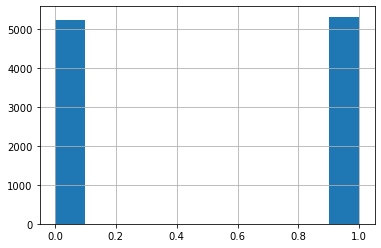

In [39]:
train_df.state.hist()

In [40]:
def split_min_max(x):
    if len(x) != 2:
        return [-1, x[0].replace('+', '')]
    return x
train_df.goal = train_df.goal.str.split('-').apply(split_min_max)
train_df['goal_min'] = train_df.goal.apply(lambda x: x[0])
train_df['goal_max'] = train_df.goal.apply(lambda x: x[1])
train_df.head()

,id,goal,country,duration,category1,category2,html_content,state,goal_min,goal_max
0,0,"[4001, 5000]",CH,29,publishing,young adult,"<div class=""contents""><div><span class=""bold"">...",0,4001,5000
1,1,"[3001, 4000]",NL,34,fashion,ready-to-wear,"<div class=""contents""><div><h1 class=""page-anc...",0,3001,4000
2,2,"[19001, 20000]",US,30,food,spaces,"<div class=""contents""><div><p> As our society ...",0,19001,20000
3,3,"[2001, 3000]",US,41,technology,3d printing,"<div class=""contents""><div><p>My name is Donal...",0,2001,3000
4,4,"[2001, 3000]",GB,29,technology,diy electronics,"<div class=""contents""><div><div class=""templat...",1,2001,3000


In [41]:
test_df.goal = test_df.goal.str.split('-').apply(split_min_max)
test_df['goal_min'] = train_df.goal.apply(lambda x: x[0])
test_df['goal_max'] = train_df.goal.apply(lambda x: x[1])
test_df.head()

,id,goal,country,duration,category1,category2,html_content,goal_min,goal_max
0,49,"[1, 1000]",US,60,dance,performances,"<div class=""contents""><div><p>We are presentin...",4001,5000
1,50,"[8001, 9000]",US,30,crafts,printing,"<div class=""contents""><div><a href=""http://dum...",3001,4000
2,51,"[9001, 10000]",US,60,design,product design,"<div class=""contents""><div><div class=""templat...",19001,20000
3,52,"[1001, 2000]",US,30,technology,software,"<div class=""contents""><div><p>This is my video...",2001,3000
4,53,"[4001, 5000]",US,59,technology,software,"<div class=""contents""><div><h1 class=""page-anc...",2001,3000


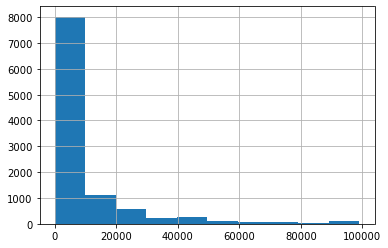

In [43]:
train_df['goal_min'].astype(np.int64).hist()

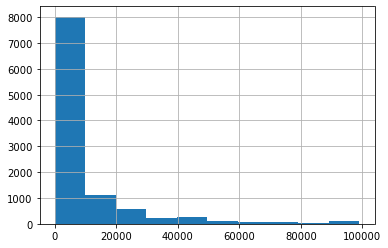

In [44]:
test_df['goal_min'].astype(np.int64).hist()

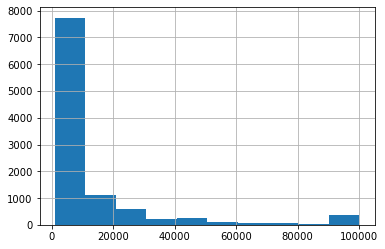

In [45]:
train_df['goal_max'].astype(np.int64).hist()

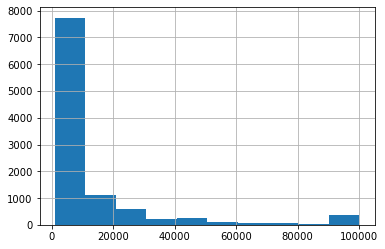

In [46]:
test_df['goal_max'].astype(np.int64).hist()

In [7]:
train_df.country.unique()

array(['CH', 'NL', 'US', 'GB', 'CA', 'ES', 'FR', 'DE', 'AU', 'IT', 'MX',
       'NZ', 'NO', 'DK', 'HK', 'SG', 'BE', 'SE', 'IE', 'JP', 'AT', 'LU'],
      dtype=object)

In [8]:
test_df.country.unique()

array(['US', 'NZ', 'ES', 'GB', 'CA', 'DE', 'AU', 'IE', 'IT', 'MX', 'JP',
       'AT', 'SE', 'NO', 'SG', 'NL', 'FR', 'DK', 'BE', 'HK', 'CH', 'LU'],
      dtype=object)

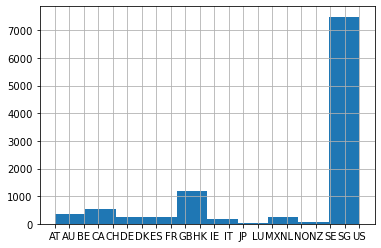

In [12]:
train_df.country.sort_values().hist()

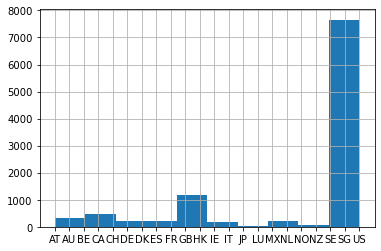

In [13]:
test_df.country.sort_values().hist()

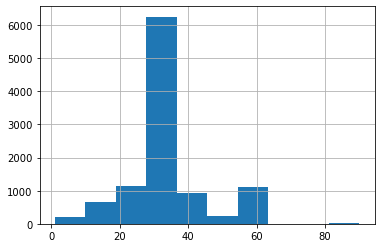

In [14]:
train_df.duration.hist()

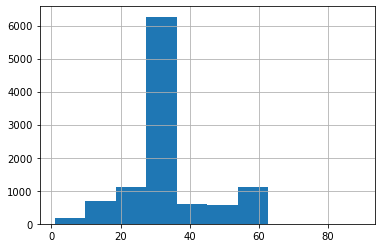

In [15]:
test_df.duration.hist()

In [16]:
train_df.category1.unique()

array(['publishing', 'fashion', 'food', 'technology', 'photography',
       'art', 'film & video', 'dance', 'design', 'games', 'journalism',
       'music', 'comics', 'theater', 'crafts'], dtype=object)

In [17]:
test_df.category1.unique()

array(['dance', 'crafts', 'design', 'technology', 'food', 'publishing',
       'fashion', 'theater', 'photography', 'art', 'film & video',
       'music', 'games', 'journalism', 'comics'], dtype=object)

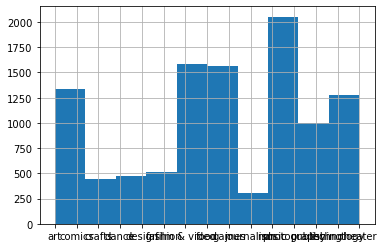

In [18]:
train_df.category1.sort_values().hist()

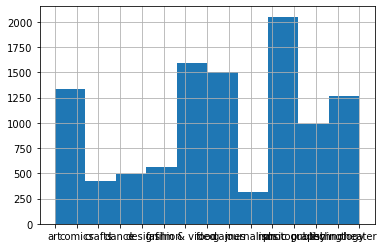

In [19]:
test_df.category1.sort_values().hist()

In [21]:
t = train_df.category2.unique()
t, len(t)

(array(['young adult', 'ready-to-wear', 'spaces', '3d printing',
        'diy electronics', 'fine art', 'apparel', 'mixed media',
        'periodicals', 'documentary', 'graphic design', 'animation',
        'fantasy', 'gaming hardware', 'performance art', 'shorts', 'print',
        'video games', 'photobooks', 'flight', 'indie rock', 'nonfiction',
        'drinks', 'public art', 'vegan', 'science fiction',
        'playing cards', 'fiction', 'performances', 'webcomics',
        'conceptual art', 'accessories', 'hip-hop', 'wearables',
        'music videos', 'pop', 'digital art', 'video', 'country & folk',
        'art books', 'calendars', 'plays', 'restaurants', 'food trucks',
        'live games', 'horror', 'rock', 'comedy', 'narrative film',
        'electronic music', 'places', 'people', 'immersive', 'woodworking',
        'jazz', 'civic design', 'webseries', "farmer's markets",
        'footwear', 'classical music', 'interactive design', 'jewelry',
        'mobile games', 'illustra

In [22]:
t = test_df.category2.unique()
t, len(t)

(array(['performances', 'printing', 'product design', 'software',
        'hardware', 'small batch', 'poetry', 'accessories', 'experimental',
        'photobooks', 'mixed media', 'animation', 'public art',
        'sculpture', 'wearables', 'television', 'painting', 'diy', 'faith',
        'electronic music', 'periodicals', 'performance art', 'metal',
        'festivals', 'plays', 'science fiction', 'digital art', 'places',
        'apparel', 'webseries', 'indie rock', 'couture', 'cookbooks',
        'web', 'ready-to-wear', 'live games', 'pop', 'radio & podcasts',
        'literary journals', 'fine art', 'apps', 'young adult',
        'country & folk', 'audio', 'nonfiction', 'illustration',
        'video art', 'tabletop games', 'narrative film', 'architecture',
        'hip-hop', 'drinks', 'vegan', 'comic books', 'academic', 'action',
        'blues', 'stationery', 'mobile games', 'anthologies',
        'classical music', 'food trucks', 'art books', 'footwear', 'video',
        'jewelr

In [23]:
train_df.html_content[0]

'<div class="contents"><div><span class="bold">Mark Saggia</span> is an Italian writer who emigrated in Switzerland.<p>He is a Nerd, Star Wars, Marvel Comics and videogames Fanatic! IT\'s part of his entire life.</p><p>The story born when Mark, thinking about The Big Bang Theory, understood that what\'s missing in the world is a nerd story for who loves videogames and all "things" like this. A story wrote in typical nerd language.</p><p>The book has been published in Italian. It can be found at amazon.it or via Facebook. You can find some info at <a href="http://dummy.com" to a large one, who wouldn\'t have respect for his ideas.\xa0</p><p>They can do many things, sometimes only for money, that\'s not our idea of success.\xa0</p><p>This means that our small, unique, caring publisher, can’t reach the USA. No matter how hard they tries.</p><p>Money for printing, find someone for distribution, marketing and other things are needed.\xa0</p><p>So we ventured to USA. We searched and searched

In [24]:
test_df.html_content[0]

'<div class="contents"><div><p>We are presenting two new important works featuring an accomplished case of dancers.\xa0 I want to be able to pay this case of dancers as much as possible, please dontate to hlep us accomplish this task.</p><p>All proceeds generated will go directly to all the dancers, who have all donated their time, energy and creativity to make \nthis dance work possible!\xa0 These two works would not exist without their contribution.</p><p>Shifting Earth, explores the effects of change that life can unexpectedly bring to the human experience. Like the harsh and sudden movements of the tectonic plates beneath earth’s surface, life shifts in unexpected ways that make us vulnerable to sudden loss and illness that rapidly forces us to undergo monumental shifts that change our paths forever, forcing us to adapt. Rapid change is brought to life onstage with great kinetic waves of motion, punctuated by moments of stillness. Dancers create sharp angles and slicing limbs that 